In [1]:
import scipy
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os





In [179]:
# img=image.load_img("basedata/train/cucumber/image_4.jpg")

In [180]:
# plt.imshow(img)

In [181]:
# cv2.imread("basedata/train/cucumber/image_3.jpg")

In [182]:
# cv2.imread("basedata/train/cucumber/image_3.jpg").shape

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset =train.flow_from_directory('basedata/train/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset =train.flow_from_directory('basedata/validation/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 164 images belonging to 2 classes.
Found 0 images belonging to 8 classes.


In [4]:
train_dataset.class_indices

{'carrot': 0, 'lemon': 1}

In [5]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  ])

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [11]:
try:
    model_fit = model.fit(train_dataset,
                          steps_per_epoch=3,
                          epochs=10,
                          validation_data=validation_dataset)
except Exception as e:
    print("An error occurred:", e)
    raise  # Re-raise the exception to see the full traceback


Epoch 1/10
3/3 [==============================] - 1s 265ms/step - loss: 2.6637 - accuracy: 0.4444
Epoch 2/10
3/3 [==============================] - 1s 259ms/step - loss: 0.6695 - accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 1s 257ms/step - loss: 0.5798 - accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 1s 270ms/step - loss: 0.5621 - accuracy: 0.7778
Epoch 5/10
3/3 [==============================] - 1s 270ms/step - loss: 0.4665 - accuracy: 0.7778
Epoch 6/10
3/3 [==============================] - 1s 264ms/step - loss: 0.2458 - accuracy: 0.8889
Epoch 7/10
3/3 [==============================] - 1s 250ms/step - loss: 0.4410 - accuracy: 0.8889
Epoch 8/10
3/3 [==============================] - 1s 264ms/step - loss: 0.2895 - accuracy: 0.8889
Epoch 9/10
3/3 [==============================] - 1s 264ms/step - loss: 0.1516 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 259ms/step - loss: 0.1859 - accuracy: 0.8889


In [12]:
train_dataset.class_indices

{'carrot': 0, 'lemon': 1}

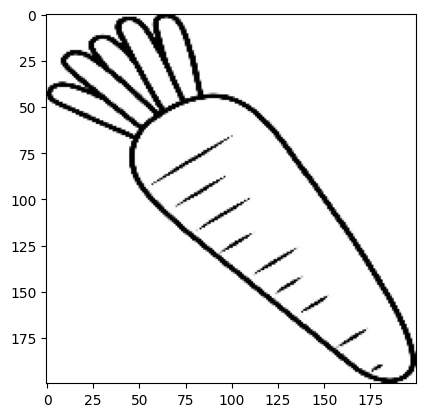

1/1 [==============================] - 0s 37ms/step
this is lemon


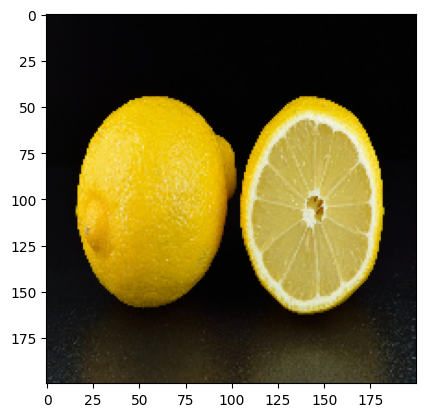

1/1 [==============================] - 0s 41ms/step
this is lemon


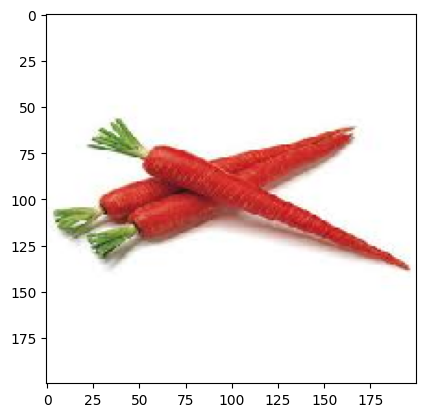

1/1 [==============================] - 0s 81ms/step
this is lemon


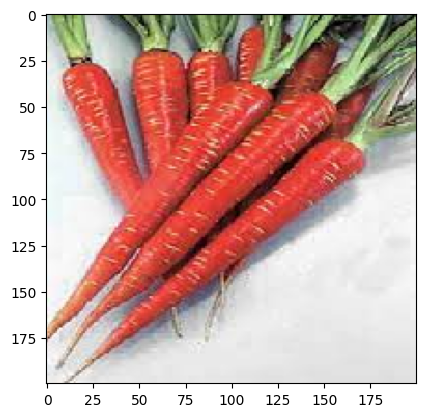

1/1 [==============================] - 0s 38ms/step
This is carrot


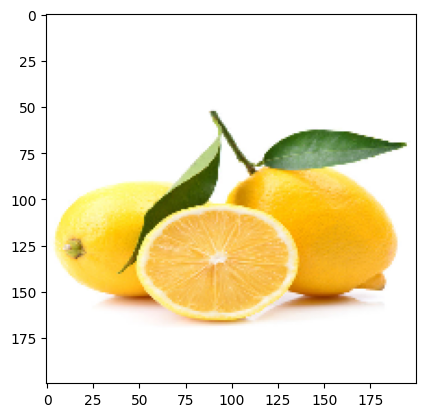

1/1 [==============================] - 0s 39ms/step
this is lemon


In [13]:
dir_path='basedata/test'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=model.predict(images)
  if val==0:
    print("This is carrot")
  else:
    print("this is lemon")